## BIG DATA MINING AND ANALYTICS

##### DENISE PRISCILA MUWANGUZI
##### M23B23/010    ---- B20237

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, chi2_contingency, ttest_ind, f_oneway

In [9]:
# Load the Excel file
df = pd.read_excel("Bike_Sales.xlsx")
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,January,2017,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",2,1519,2443,1848,3038,4886
1,2017-01-01,1,January,2017,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2,1252,2295,2086,2504,4590
2,2017-01-01,1,January,2017,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,2814,4342,7156
3,2017-01-01,1,January,2017,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",2,713,1120,814,1426,2240
4,2017-01-01,1,January,2017,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",2,344,540,392,688,1080


#### 1. What is the relationship between two continuous variables?

Order quantity and Profit 

In [ ]:
x = df["Order_Quantity"]
y = df["Profit"]
pearson_r, p_val_cont = pearsonr(x, y)
print("Profit vs Order_Quantity")
print(f"Pearson r = {pearson_r:.3f}, p-value = {p_val_cont:.4f}\n")

Profit vs Order_Quantity
Pearson r = -0.269, p-value = 0.0000



##### Interpretation
- There is a weak negative correlation of -0.269.
- This means that as Order_Quantity increases, Profit tends to decrease slightly.

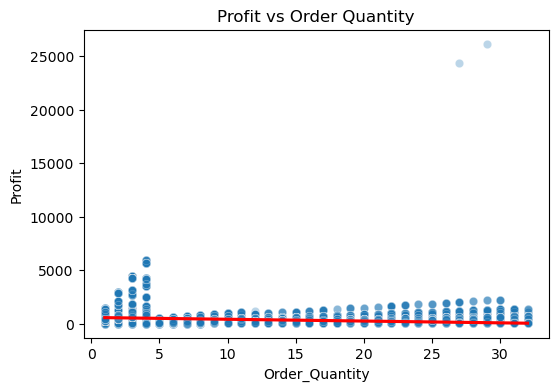

In [11]:
# Scatter plot for Continuous vs Continuous
plt.figure(figsize=(6,4))
sns.scatterplot(x="Order_Quantity", y="Profit", data=df, alpha=0.3)
sns.regplot(x="Order_Quantity", y="Profit", data=df, scatter=False, color="red")
plt.title("Profit vs Order Quantity")
plt.show()

#### Interpretation
- The red line is slightly sloping downwards, reflecting the negative Pearson correlation. (r = -0.269)

- The weak negative slope aligns with the weak negative correlation. 

#### 2. What is the relationship between two categorical variables?
Customer gender and product category

In [ ]:
contingency_table = pd.crosstab(df["Customer_Gender"], df["Product_Category"])
chi2, p_val_cat, dof, expected = chi2_contingency(contingency_table)
print("Customer_Gender vs Product_Category")
print(f"Chi² = {chi2:.3f}, dof = {dof}, p-value = {p_val_cat:.4f}\n")

Categorical vs Categorical (Customer_Gender vs Product_Category)
Chi² = 18.976, dof = 2, p-value = 0.0001



#### Interpretation
- There is a statistically significant association between Customer_Gender and Product_Category. The products customers choose are likely influenced by their gender.



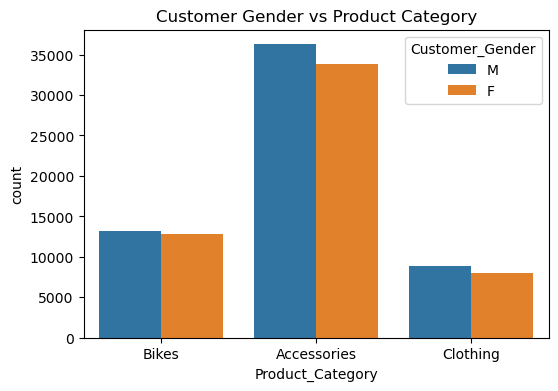

In [ ]:
# Bar plot for Categorical vs Categorical
plt.figure(figsize=(6,4))
sns.countplot(x="Product_Category", hue="Customer_Gender", data=df)
plt.title("Customer Gender vs Product Category")
plt.show()

#### Interpretation
- Accessories are the most popular across genders, followed by bikes, then clothing.

- Males tend to purchase slightly more than females across all categories, which aligns with the Chi-square test that showed a significant association between gender and product category.

#### 3. Relationship between one categorical and one continuous variable?

Profit and Gender 

In [18]:
# ANOVA (Profit vs Age_Group)
anova_groups = [group["Profit"].values for name, group in df.groupby("Age_Group")]
f_stat, p_val_anova = f_oneway(*anova_groups)
print("Profit vs Age_Group")
print(f"F-stat = {f_stat:.3f}, p-value = {p_val_anova:.4e}\n")

Profit vs Age_Group
F-stat = 57.568, p-value = 3.5411e-37



#### Interpretation
- The result confirms a strong relationship between Age_Group and Profit, with significant differences in average profit across the groups.

- This implies that customer age demographics play a critical role in determining profitability in the bike sales.

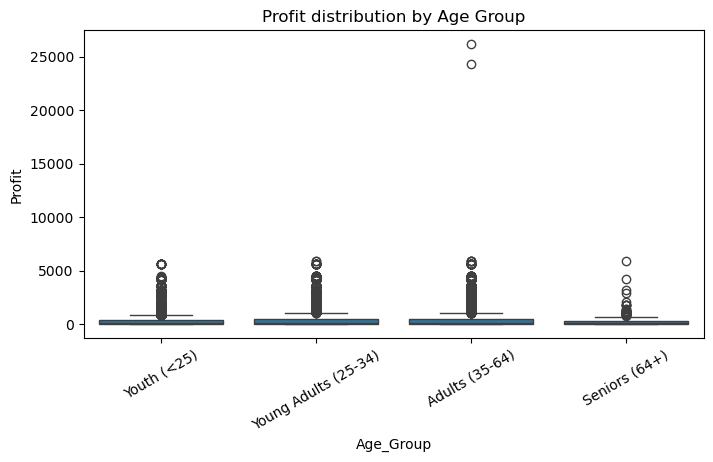

In [ ]:
# Boxplot for Profit vs Age_Group
plt.figure(figsize=(8,4))
sns.boxplot(x="Age_Group", y="Profit", data=df)
plt.title("Profit distribution by Age Group")
plt.xticks(rotation=30)
plt.show()